In [10]:
import pandas as pd
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import numpy as np

In [11]:
df = pd.read_csv('clean2000.csv')
df

,review,sentiment
0,bánh thơm ngon nhiều bơ mùi tỏi cũng không hắc...,positive
1,ngon lắm,positive
2,thèm quá nên vừa lấy về là dứt lần numberv cái...,positive
3,ngon xỉu lun,positive
4,bánh mỳ ngon lắm,positive
...,...,...
1995,mua về mục_đích numberv người ăn mà chỉ cho nu...,negative
1996,bánh mỳ khô dở,negative
1997,thật_sự hộp cơm quá tệ mua có nói trước trẻ nh...,negative
1998,cá viên không ngon nó kì lắm phô_mai không ngo...,negative


In [12]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [13]:
tfidf_vec = TfidfVectorizer()

X_train = tfidf_vec.fit_transform(train['review'])
Y_train = train['sentiment']

X_test = tfidf_vec.transform(test['review'])
Y_test = test['sentiment']


In [14]:
# 0 -> negative
# 1 -> positive
Y = np.unique(Y_train,return_inverse=True)
y_train = Y[1]

Y_test = np.unique(Y_test,return_inverse=True)
y_test = Y_test[1]


# Naive Bayes

Naive Bayes
              precision    recall  f1-score   support

           0      0.886     0.927     0.906       177
           1      0.940     0.906     0.922       223

    accuracy                          0.915       400
   macro avg      0.913     0.916     0.914       400
weighted avg      0.916     0.915     0.915       400

[[164  13]
 [ 21 202]]


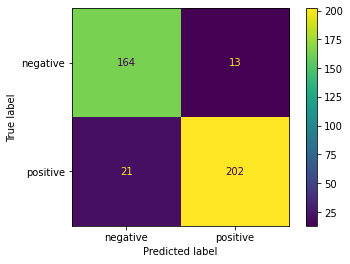

In [15]:
classifiers = [
    ('Naive Bayes', MultinomialNB()),
]
for name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    report = metrics.classification_report(y_test, y_pred, labels=[0,1], digits=3)
    print(name)
    print(report)
    cm = confusion_matrix(y_test, y_pred, labels=[0,1])
    print(cm)
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['negative', 'positive']).plot()

# SVM

SVM
              precision    recall  f1-score   support

           0      0.885     0.960     0.921       177
           1      0.966     0.901     0.933       223

    accuracy                          0.927       400
   macro avg      0.926     0.931     0.927       400
weighted avg      0.931     0.927     0.928       400

[[170   7]
 [ 22 201]]


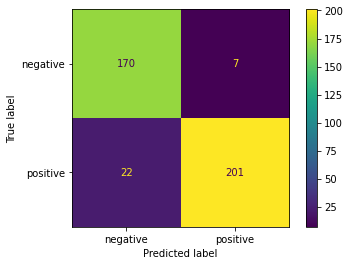

In [16]:
classifiers = [
    ('SVM', SVC()),
]
for name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    report = metrics.classification_report(y_test, y_pred, labels=[0, 1], digits=3)
    print(name)
    print(report)
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    print(cm)
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['negative','positive']).plot()

GridsearchCV

In [17]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf', 'poly', 'sigmoid','linear']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.847 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.856 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.853 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.797 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.831 total time=   0.1s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.559 total time=   0.1s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.559 total time=   0.1s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.559 total time=   0.1s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.559 total time=   0.1s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.556 total time=   0.1s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.903 total time=   0.1s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoi

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
             verbose=3)

In [18]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=10, gamma=1)


In [20]:
grid_predictions = grid.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, grid_predictions,digits=3)) 

              precision    recall  f1-score   support

           0      0.898     0.944     0.920       177
           1      0.953     0.915     0.934       223

    accuracy                          0.927       400
   macro avg      0.926     0.929     0.927       400
weighted avg      0.929     0.927     0.928       400

